In [2]:
%reload_ext autoreload
%autoreload 2
import time
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from dops import *
from preprocessing import *

In [18]:
# read data
x_train, y_train, bilevel_df, multilevel_df = get_data('./Data/states_bpleq65.p')

In [19]:
# covergae matrix
manual_bilevel_coverage = np.loadtxt('bi_cover.txt', delimiter=',')
manual_multilevel_coverage = np.loadtxt('multi_cover.txt', delimiter=',')

In [20]:
# frequency of measurements
measure_freq = {'bicarbonate': 2.981861,'bun': 1.499739,'creatinine': 1.505387,\
                'fio2': 9.647378,'glucose': 6.117458,'hct': 1.975867,'lactate': 1.330443,\
                'magnesium': 1.955151,'platelets': 1.459454,'potassium': 2.182242,\
                'sodium': 1.744012,'wbc': 1.395242, 'urine': 14.13}
harder_measure = sorted(measure_freq, key=measure_freq.get)

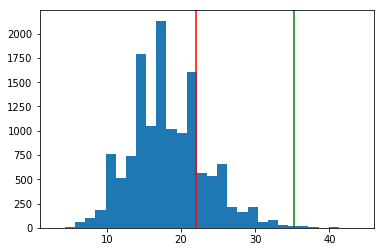

In [43]:
# distribution of saps score
plt.hist(y_train['saps'], bins=30)
plt.axvline(np.percentile(y_train['saps'], 80), color='r')
plt.axvline(y_train['saps'].max()*0.8, color='g');

In [1]:
# for i in range(1):
#     measure = harder_measure[0:6]
#     bi_cover, multi_cover = [], []
#     for m in measure:
#         bi_cover.append(bilevel_df.columns.get_loc(m))
#         multi_cover.append(multilevel_df.columns.get_loc(m+'0'))
#         multi_cover.append(multilevel_df.columns.get_loc(m+'1'))
#     print("Starting DOPS when dropping " + str(measure))
            
#     bi_preds = []
#     bi_preds_lin = []
#     bi_preds_cover_self = []
#     multi_preds = []
#     multi_preds_lin = []
#     multi_preds_cover_self = []
#     truths = []
#     t1 = time.time()
#     repeat = 10
#     for i in range(repeat):
#         start = time.time()
#         np.random.seed(i)
#         index = np.random.choice(len(multilevel_df), size=1000, replace=False)
#         bi_x, multi_x, y = bilevel_df.iloc[index], multilevel_df.iloc[index], y_train.iloc[index]
#         bi_x[measure] = 0
#         multi_x[[m+'0' for m in measure]] = 1
#         bi_x_train_dops = bi_x.values
#         multi_x_train_dops = multi_x.values
#         y_train_dops = y['saps'].values
#         bi_X_train, bi_X_test,Y_train,Y_test = train_test_split(bi_x_train_dops,y_train_dops,test_size=0.02,random_state=i)
#         multi_X_train, multi_X_test,Y_train,Y_test = train_test_split(multi_x_train_dops,y_train_dops,test_size=0.02,random_state=i)
#         test_len = len(Y_test)
#         bi_reg = LinearRegression().fit(bi_X_train, Y_train)
#         bi_res0 = bi_reg.predict(bi_X_test)
#         bi_pred_theta0 = bi_reg.coef_
#         bi_res1, bi_pred_theta1, bi_max_item_index = dops(bi_X_train, Y_train, bi_X_test, manual_bilevel_coverage, test_len, 0.8, \
#                                                np.zeros(len(manual_bilevel_coverage)), loss='quantile', batch_size=64, eta=1, iters=50, print_every=20,cover_indices=bi_cover)
#         bi_res2, bi_pred_theta2, bi_max_item_index = dops(bi_X_train, Y_train, bi_X_test, np.eye(len(manual_bilevel_coverage)), test_len, 0.8, \
#                                                np.zeros(len(manual_bilevel_coverage)), loss='quantile', batch_size=64, eta=1, iters=50, print_every=20,cover_indices=bi_cover)
#         multi_reg = LinearRegression().fit(multi_X_train, Y_train)
#         multi_res0 = multi_reg.predict(multi_X_test)
#         multi_pred_theta0 = multi_reg.coef_
#         multi_res1, multi_pred_theta1, multi_max_item_index = dops(multi_X_train, Y_train, multi_X_test, manual_multilevel_coverage, test_len, 0.8, \
#                                                np.zeros(len(manual_multilevel_coverage)), loss='quantile', batch_size=64, eta=1, iters=50, print_every=20,cover_indices=multi_cover)
#         multi_res2, multi_pred_theta2, multi_max_item_index = dops(multi_X_train, Y_train, multi_X_test, np.eye(len(manual_multilevel_coverage)), test_len, 0.8, \
#                                                np.zeros(len(manual_multilevel_coverage)), loss='quantile', batch_size=64, eta=1, iters=50, print_every=20,cover_indices=multi_cover)
#         bi_preds_lin.append(bi_res0)
#         bi_preds.append(bi_res1)
#         bi_preds_cover_self.append(bi_res2)
#         multi_preds_lin.append(multi_res0)
#         multi_preds.append(multi_res1)
#         multi_preds_cover_self.append(multi_res2)
#         truths.append(Y_test)
#         end = time.time()
#         print("One repetition takes {0} seconds".format(end-start))
#     t2 = time.time()
#     print('Used time: %.2fs' % (t2-t1))

In [31]:
bi_cover, multi_cover = [], []
measure = harder_measure[:8]
cols = multilevel_df.columns
cover_names = []
for m in measure:
    bi_cover.append(bilevel_df.columns.get_loc(m))
    for i in range(6):
        name = m+str(i)
        if name in cols:
            multi_cover.append(cols.get_loc(name))
            cover_names.append(name)   
        else:
            break
bi_x, multi_x, y = bilevel_df.values, multilevel_df.values, y_train['saps'].values
cover_names, bi_cover, multi_cover

(['lactate0',
  'lactate1',
  'wbc0',
  'wbc1',
  'platelets0',
  'platelets1',
  'bun0',
  'bun1',
  'creatinine0',
  'creatinine1',
  'sodium0',
  'sodium1',
  'sodium2',
  'magnesium0',
  'magnesium1',
  'hct0',
  'hct1'],
 [15, 25, 18, 9, 10, 20, 16, 13],
 [38, 39, 61, 62, 44, 45, 23, 24, 25, 26, 49, 50, 51, 40, 41, 31, 32])

In [37]:
bi_preds = []
bi_preds_theta = []
multi_preds = []
multi_preds_theta = []
truths = []
print("Starting DOPS when dropping " + str(measure))

# run dops
repeat = 1
t1 = time.time()
for i in range(repeat):
    np.random.seed(i)
    index = np.random.choice(len(y), size=10000, replace=False)
    bi_x_train_dops, multi_x_train_dops, y_train_dops = bi_x[index], multi_x[index], y[index]
    bi_x_train_dops[:, bi_cover] = 0
    multi_x_train_dops[:, multi_cover] = 0
    bi_X_train, bi_X_test,Y_train,Y_test = train_test_split(bi_x_train_dops,y_train_dops,test_size=0.05,random_state=i)
    multi_X_train, multi_X_test,Y_train,Y_test = train_test_split(multi_x_train_dops,y_train_dops,test_size=0.05,random_state=i)
    test_len = len(Y_test)
    
    # bilevel
    bi_res1, bi_pred_theta1, bi_max_item_index = dops(bi_X_train, Y_train, bi_X_test, manual_bilevel_coverage, test_len, 0.8, \
                                           np.zeros(len(manual_bilevel_coverage)), loss='quantile', batch_size=32, eta=1, iters=90, print_every=10,cover_indices=bi_cover)

    # multilevel
    multi_res1, multi_pred_theta1, multi_max_item_index = dops(multi_X_train, Y_train, multi_X_test, manual_multilevel_coverage, test_len, 0.8, \
                                           np.zeros(len(manual_multilevel_coverage)), loss='quantile', batch_size=32, eta=1, iters=90, print_every=10,cover_indices=multi_cover)
    
    # collect information
    bi_preds.append(bi_res1)
    bi_preds_theta.append(bi_pred_theta1)
    multi_preds.append(multi_res1)
    multi_preds_theta.append(multi_pred_theta1)
    truths.append(Y_test)
t2 = time.time()


Starting DOPS when dropping ['lactate', 'wbc', 'platelets', 'bun', 'creatinine', 'sodium', 'magnesium', 'hct']
Iter 10, theta: [0.34449829 0.31200557 0.32825265 0.3407691  0.27224801 0.37152067
 0.4037921  0.30202733 0.22570468 0.41667138 0.41706931 0.41764335
 0.33723151 0.40772179 0.21184039 0.41764335 0.39852851 0.26581487
 0.39055611 0.29751177 0.405685   0.28618157 0.25442011 0.3617733
 0.41586682 0.39317493], gradient: [-0.0251801  -0.02327706 -0.02392161 -0.02561455 -0.01787502 -0.02831461
 -0.03105364 -0.02170735 -0.01629899 -0.03227785 -0.03230868 -0.03235315
 -0.02556702 -0.03158456 -0.01415792 -0.03235315 -0.0308724  -0.01949612
 -0.03025481 -0.02203637 -0.03142678 -0.0191809  -0.01801941 -0.02734559
 -0.03221553 -0.03045768]
Iter 20, theta: [0.53602304 0.48699275 0.5080853  0.5310972  0.40885626 0.58437801
 0.63724032 0.46521407 0.34823367 0.65932274 0.65995239 0.66086073
 0.52720226 0.64516128 0.31604232 0.66086073 0.63061424 0.41237848
 0.61799907 0.46317197 0.64193836 0.

Iter 40, theta: [0.88935458 0.89285543 0.90111593 0.89966412 0.90769509 0.81922218
 0.87957037 0.89039874 0.90100198 0.86896713 0.8668026  0.9031665
 0.88895486 0.88101425 0.88895486 0.88101425 0.88332004 0.88664906
 0.86961551 0.9003536  0.90765159 0.88998926 0.85731281 0.88498455
 0.82297252 0.88498455 0.88374183 0.88498455 0.88498455 0.88164053
 0.88832858 0.88498455 0.83616874 0.88233105 0.9047341  0.86788851
 0.88498455 0.88498455 0.88498455 0.88498455 0.88498455 0.77087521
 0.87472496 0.89524415 0.88498455 0.71573557 0.88498455 0.56896564
 0.56950783 0.88498455 0.88498455 0.50360946 0.88303425 0.88693486
 0.88506085 0.88490826 0.88459576 0.88537335 0.89898706 0.8805686
 0.875398   0.88498455 0.72936353], gradient: [-0.0050197  -0.00536674 -0.00689609 -0.01046681 -0.00917375 -0.00141539
 -0.00420236 -0.00857713 -0.0041504  -0.0086291   0.01368669 -0.02646619
  0.00648706 -0.01926656  0.00648706 -0.01926656 -0.0085786  -0.00420089
  0.01072342 -0.02350291 -0.00759419 -0.00310411 -0

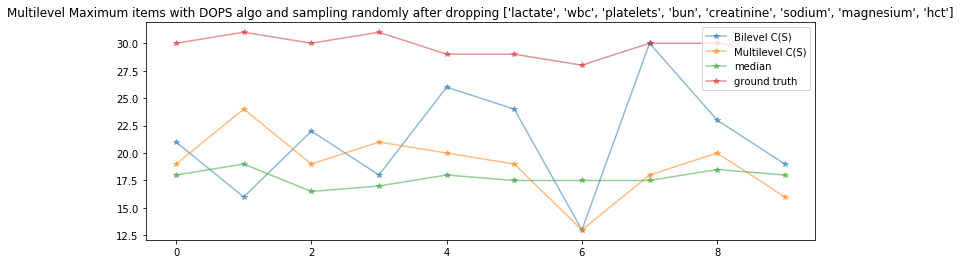

In [35]:
bi_pred = []
multi_pred = []
real = []
rand = []
for i in range(repeat):
    bi_pred.append(truths[i][np.argmax(bi_preds[i])])
    multi_pred.append(truths[i][np.argmax(multi_preds[i])])
    real.append(max(truths[i]))
    rand.append(np.median(truths[i]))

plt.figure(figsize=(12,4))
plt.plot(np.arange(0,repeat), bi_pred, '*-', alpha=0.5, label='Bilevel C(S)')
plt.plot(np.arange(0,repeat), multi_pred, '*-', alpha=0.5, label='Multilevel C(S)')
plt.plot(np.arange(0,repeat), rand, '*-', alpha=0.5, label='median')
plt.plot(np.arange(0,repeat), real, '*-', alpha=0.5, label='ground truth')
plt.legend()
plt.title('Multilevel Maximum items with DOPS algo and sampling randomly after dropping ' + str(measure))
# plt.savefig("Multilevel results after dropping " + str(measure))
plt.show()